In [167]:
# Install Packages

%pip install -q numpy pandas matplotlib seaborn scikit-learn tensorflow xgboost 
%reset -f

Note: you may need to restart the kernel to use updated packages.


In [168]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [169]:
# Read CSV file and display the first 5 rows

df = pd.read_csv('/Users/ritikabatte02/Downloads/heart_failure_clinical_records_dataset (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,time_weeks
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,17.380
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,26.070
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,30.415
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,30.415
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,34.760


In [170]:
# Understand the dataset 

df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  time_weeks                299 non-null    float64
dtypes: float64

<bound method NDFrame.describe of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  seru

In [175]:
# XG Boost Model with all features

# Split the data into train and test sets 
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Define the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed = 123) 

# Train the model
model.fit(X_train, y_train)

# Predictions 
y_pred = model.predict(X_test) 

# Evaluate the model and performance meterics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:" , "\n", cm)


Accuracy: 0.8
Precision: 0.8421052631578947
Recall: 0.64
F1 Score: 0.7272727272727273
Confusion Matrix: 
 [[32  3]
 [ 9 16]]


In [176]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print('MCC:', mcc)

# TP rate
from sklearn.metrics import recall_score
tp_rate = recall_score(y_test, y_pred)
print('TP Rate:', tp_rate)

# TN rate
tn_rate = cm[0,0]/(cm[0,0] + cm[0,1])
print('TN Rate:', tn_rate)

# precision recall AUC 
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print('Precision-Recall AUC:', pr_auc)

# ROC scores
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, y_pred)
print('ROC:', roc)

MCC: 0.5874473963050967
TP Rate: 0.64
TN Rate: 0.9142857142857143
Precision-Recall AUC: 0.8160526315789474
ROC: 0.7771428571428572


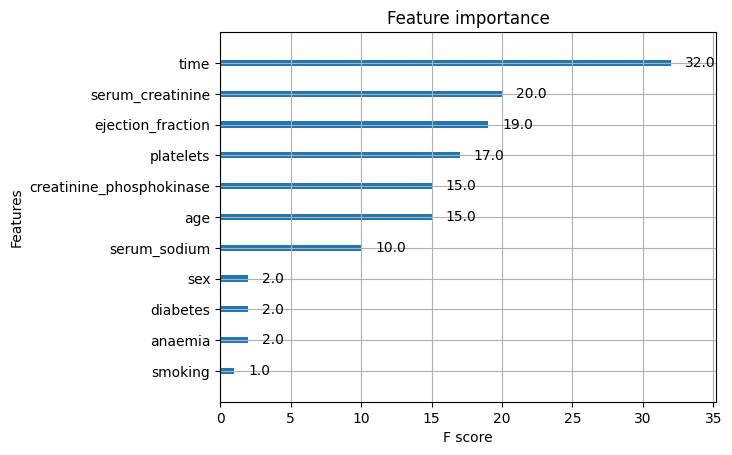

In [178]:
# Plot the feature importance of the model 
xgb.plot_importance(model)
plt.show()

In [143]:
# XG Boost Model with Feature Selection (Only serum_creatinine and ejection_fraction)

# Split the data into train and test sets 
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Only use serum_creatinine and ejection_fraction as features
X_train = X_train[['serum_creatinine', 'ejection_fraction']]
X_test = X_test[['serum_creatinine', 'ejection_fraction']]

# Define the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed = 123) 

# Train the model
model.fit(X_train, y_train)

# Predictions 
y_pred = model.predict(X_test) 

# Evaluate the model and performance meterics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:" , "\n", cm)

Accuracy: 0.7
Precision: 0.7333333333333333
Recall: 0.44
F1 Score: 0.55
Confusion Matrix: 
 [[31  4]
 [14 11]]


In [144]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print('MCC:', mcc)

# TP rate
from sklearn.metrics import recall_score
tp_rate = recall_score(y_test, y_pred)
print('TP Rate:', tp_rate)

# TN rate
tn_rate = cm[0,0]/(cm[0,0] + cm[0,1])
print('TN Rate:', tn_rate)

# precision recall AUC 
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print('Precision-Recall AUC:', pr_auc)

# ROC scores
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, y_pred)
print('ROC:', roc)

MCC: 0.3708420277204426
TP Rate: 0.44
TN Rate: 0.8857142857142857
Precision-Recall AUC: 0.7033333333333334
ROC: 0.6628571428571428


In [157]:
# K Nearest Neighbors Model

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)

# Split the data into 60% train and 20% test and 20% validation sets 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Define the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train, y_train)

# Predictions
y_val_pred = knn_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Predictions
y_test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

# Evaluate the model and performance meterics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Confusion Matrix with tabular representation 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:" , "\n", cm)



Validation Accuracy: 61.11%
Test Accuracy: 56.25%
Accuracy: 0.5625
Precision: 0.6666666666666666
Recall: 0.32
F1 Score: 0.43243243243243246
Confusion Matrix: 
 [[19  4]
 [17  8]]


In [159]:
knn_model.predict(X_test)[0:5]

array([0, 0, 0, 1, 1])

In [148]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_pred)
print('MCC:', mcc)

# TP rate
from sklearn.metrics import recall_score
tp_rate = recall_score(y_test, y_test_pred)
print('TP Rate:', tp_rate)

# TN rate
tn_rate = cm[0,0]/(cm[0,0] + cm[0,1])
print('TN Rate:', tn_rate)

# precision recall AUC 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
auc = auc(recall, precision)
print('AUC:', auc)

# ROC scores
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, y_test_pred)
print('ROC:', roc)


MCC: 0.09325048082403138
TP Rate: 0.2
TN Rate: 0.8695652173913043
AUC: 0.6208333333333335
ROC: 0.5347826086956522


In [12]:
# Feature Importance for KNN model 
# KNN model does not have feature importance as it is based on distance and does not have any coefficients to calculate feature importance 

In [164]:
# XGBoost Model with Hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [10, 50, 100, 200]
}

grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
# Best hyperparameters for XGBoost model
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.722 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.889 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.861 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.806 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.943 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.806 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.806 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.806 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.833 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.943 total time=   0.0

In [91]:
# KNN model with Hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(knn_model, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
# Best hyperparameters for KNN model
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.722 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.778 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.667 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.722 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.743 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.694 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.694 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.611 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.686 tot